# Task 1

### Imports

In [1]:
from numpy.linalg import lstsq, inv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from typing import Tuple, Optional
import os

### Setup 

In [3]:
lin_func_file = "linear_function_data.txt"
nonlin_func_file = "nonlinear_function_data.txt"

### Functions

In [4]:
def get_dependent_target_from_df(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, pd.DataFrame]:
    """
    Input:
        df: The input DataFrame containing the dependent and target variables
    Purpose:
        Extracts the dependent variable and target variable from a DataFrame
    Returns: 
        dependent: The dependent variable extracted from the DataFrame
        target: The target variable extracted from the DataFrame
        func_data: The DataFrame with column names renamed for clarity and convenience
    """
    func_data = df.rename({0: "dependent", 1: "target"}, axis = 1)
    
    # Considering that we don't care about estimating the constant, "dependent" is as well the matrix A 
    dependent = func_data.iloc[:, :-1].values
    
    # outcome variable has to be shaped into n*1 matrix
    nrows = func_data.shape[0]
    target = func_data.iloc[:, -1].values.reshape(nrows,1)

    return dependent, target, func_data

In [5]:
def get_dependent_target_from_txt(file_name: str) -> Tuple[np.ndarray, np.ndarray, pd.DataFrame]:
    """
    Input:
        file_name: The name of the text file containing the data, with space-separated values
    Purpose:
        Extracts the dependent variable and target variable from a text file
    Returns:
        dependent: The dependent variable extracted from the DataFrame
        target: The target variable extracted from the DataFrame
        func_data: The DataFrame with column names renamed for clarity and convenience
    """
    func_df = pd.read_csv(file_name, sep = " ", header = None)
    dependent, target, func_data = get_dependent_target_from_df(func_df)
    return dependent, target, func_data

In [6]:
def get_y_hat(x: np.ndarray, y: np.ndarray, rcond: float = 1) -> np.ndarray:
    """
    Input:
        x: The independent variable values
        y: The target variable values
        rcond: The condition number threshold for least squares solution (default: 1)
    Purpose:
        Calculates the approximate function and estimates the target variable based on the given dataset
    Returns: 
        target_est: The estimated target variable values
    """
    b_0_hat = lstsq(x, y, rcond=rcond)[0]
    target_est = x*b_0_hat
    print(f"The approximate function in the the given dataset is: y_hat = {b_0_hat[0][0]}*x.")
    return target_est

In [7]:
def plot_scatter(x: np.ndarray, y: np.ndarray, y_hat: Optional[np.ndarray] = None) -> None: 
    """
    Input:
        x: The independent variable values
        y: The target variable values
        y_hat: The estimated target variable values (optional)
    Purpose:
        Creates a scatter plot of the given dataset
        If y_hat is provided, a line plot of the estimated target variable is overlaid on the scatter plot
    """
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, color = "k", alpha = 0.2, s = 100)
    if y_hat is not None:
        plt.plot(x, y_hat, label = "line", color = "r")
    plt.show()

In [8]:
def phi_l(mu_l: float, x:  np.ndarray, epsilon: float) -> np.ndarray:
    """
    Input:
        mu_l: The center parameter of the radial basis function
        x: The input values at which to evaluate the radial basis function
        epsilon: The bandwidth parameter of the radial basis function
    Purpose:
        Evaluates the radial basis function at the given input values x
    Returns: 
        The value of the radial basis function at x
    """
    return np.exp(-(abs(mu_l - x))**2 / epsilon)

### Running the code 

1. Approximating the function in dataset (A) with a linear function 

In [9]:
dependent, target, lin_func_data = get_dependent_target_from_txt(lin_func_file)

In [10]:
target.shape

(1000, 1)

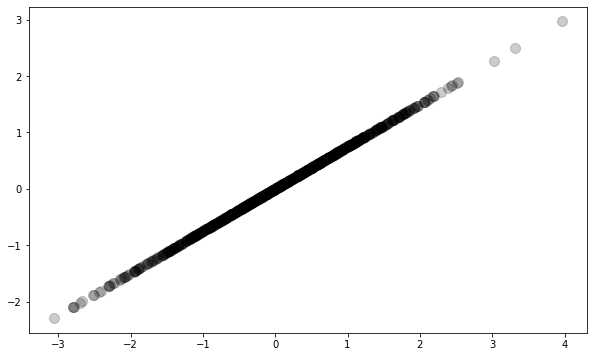

In [11]:
# Initial visualisation of the linear data
plot_scatter(dependent, target)

In [12]:
# get the slope and y_hat
y_hat = get_y_hat(dependent, target)

The approximate function in the the given dataset is: y_hat = 0.750000240138714*x.


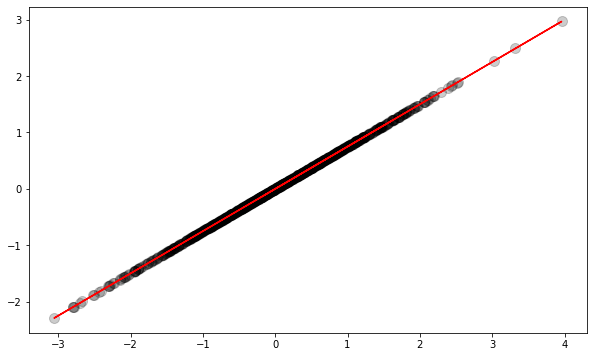

In [13]:
# Visualise the approximated linear function
plot_scatter(dependent, target, y_hat=y_hat)

2. Approximating the function in dataset (B) with a linear function

In [14]:
dependent, target, nonlin_func_data = get_dependent_target_from_txt(nonlin_func_file)

In [15]:
dependent.shape

(1000, 1)

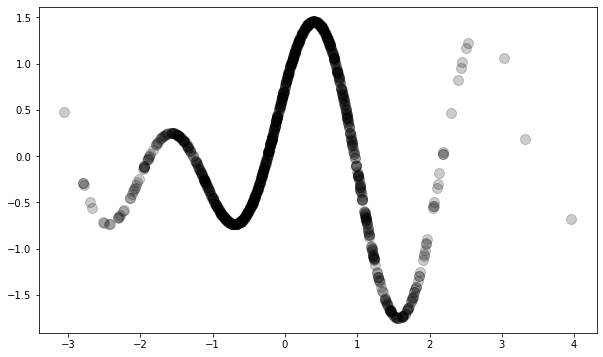

In [16]:
# Initial visualisation of the non-linear data
plot_scatter(dependent, target)

In [17]:
# get the slope and y_hat
y_hat = get_y_hat(dependent, target)

The approximate function in the the given dataset is: y_hat = 0.033210360778120035*x.


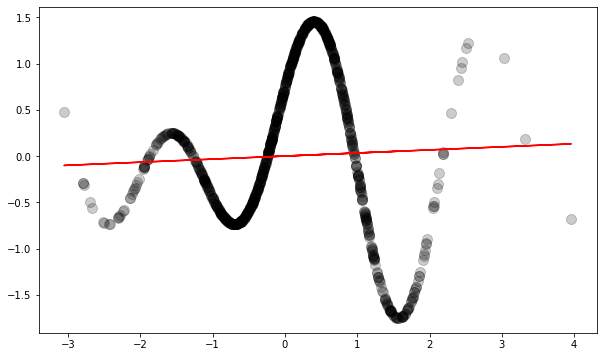

In [18]:
# Visualise the approximated linear function
plot_scatter(dependent, target, y_hat=y_hat)

3. Approximating the function in dataset (B) with a combination of radial functions

        - plotting the radial distributions

In [114]:
# defining the centres of the basis functions
# mu = np.linspace(-3.8, 2.8, 4) OUTDATED
mu = np.array([-3.6, -1.6,  0.5,  2.7])
# defining equally spaced x's, corresponding to the non-linear data 
xs = np.linspace(-5, 5, 1000)

In [115]:
# Defining all the phi's, corresponding to all the previously defined centres
phi_0 = phi_l(mu[0], xs, 0.6)
phi_1 = phi_l(mu[1], xs, 1.1)
phi_2 = phi_l(mu[2], xs, 0.5)
phi_3 = phi_l(mu[3], xs, 0.65)

Text(0.5, 1.0, 'Visualisation of the radial basis functions')

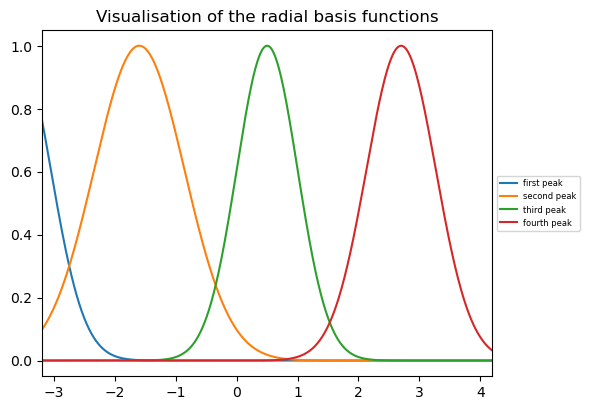

In [116]:
# Initial plot of the radial basis functions wrt the previously defined phis
plt.figure(num=0, dpi = 100)
plt.xlim(-3.2, 4.2)
plt.plot(xs, phi_0, label = 'first peak')
plt.plot(xs, phi_1, label = 'second peak')
plt.plot(xs, phi_2, label = 'third peak')
plt.plot(xs, phi_3, label = 'fourth peak')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6)
plt.tight_layout()
plt.title('Visualisation of the radial basis functions')

        - Using the radial basis functions for the non-linear data

In [117]:
# Stacking all the phis next to each other, forming phi(X)
phi_mat = np.hstack((phi_0.reshape(1000, 1), phi_1.reshape(1000, 1), phi_2.reshape(1000, 1), phi_3.reshape(1000, 1)))

In [118]:
# 2 is added to target to make all the values over 0. Getting the values of the coefficients
c_0, c_1, c_2, c_3 = lstsq(phi_mat, target+2)[0]

<ipython-input-118-83f53994ea8b>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c_0, c_1, c_2, c_3 = lstsq(phi_mat, target+2)[0]


In [112]:
# estimating the target variable using (6) from Exercise Sheet 5, Section 1.2
target_est = c_0*phi_0+c_1*phi_1+c_2*phi_2+c_3*phi_3

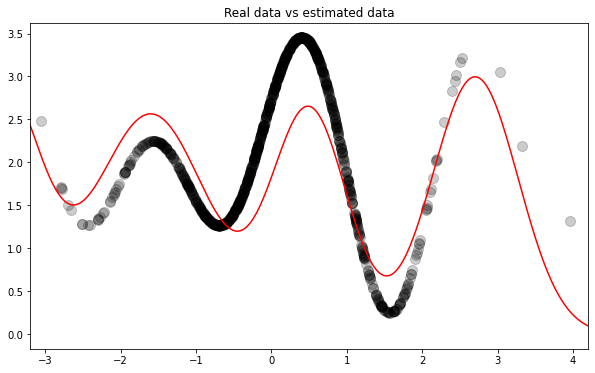

In [113]:
# Plotting the original data and the estimated function(x)
plt.figure(figsize=(10,6))
plt.xlim(-3.2, 4.2)
plt.scatter(dependent.reshape(1000,), target+2, color = "k", alpha = 0.2, s = 100)
plt.plot(xs, target_est, label = "line", color = "r")
plt.title('Real data vs estimated data')
plt.show()